<a href="https://colab.research.google.com/github/MichaelGajhede/BiBi_enzyme_kinetics/blob/main/BiBi_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

From Marangoni, Alejandro G., Enzyme kinetics : A modern approach 2003, Wiley
![picture](https://drive.google.com/uc?id=1WuEcGPH00CQM7L2Eivc4Oed3s5TIFjEj)

In [2]:
#MM 2 substrate sequential ordered rate function
def BiBi(X,  Vmax, Ks_A, K_AB):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

From Marangoni, Alejandro G., Enzyme kinetics : A modern approach 2003, Wiley
![picture](https://drive.google.com/uc?id=1O0xGxA6dXDYqd7YwHS34M44RhqHXIyII)
Random order sequential reaction

In [3]:
#MM 2 substrate sequential random ordered rate function
def BiBi_random(X,  Vmax, Ks_A, Ks_B, K_AB, K_BA):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + K_BA * C_B + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

In [4]:
import csv

def write_meshgrid_to_csv(x, y, z, filename):
    from google.colab import drive
    drive.mount('/content/drive')
    # Open the CSV file for writing
    with open('/content/drive/MyDrive/' + filename, 'w', newline='') as csvfile:
        # Create the CSV writer object
        writer = csv.writer(csvfile)

        # Write the header row
        writer.writerow(['x', 'y', 'v'])
        print(z)

        # Write the gridmesh data
        for i in range(len(x)):
            writer.writerow([x[i], y[i], z[i]])


In [5]:
#Import pandas library
import pandas as pd

# Define a function that takes a file name as an argument
def read_csv_to_df(file_name):
  csv = '/content/drive/MyDrive/' + file_name
  # Read the csv file using pandas.read_csv
  df = pd.read_csv(csv)
  # Return the dataframe
  return df


In [21]:
my_df = read_csv_to_df("meshgrid.csv")
# Print the dataframe
my_df


,x,y,v
0,10.0,20.0,1.015784
1,48.0,20.0,2.289323
2,86.0,20.0,2.671360
3,124.0,20.0,2.744347
4,162.0,20.0,2.914391
5,200.0,20.0,3.027342
6,10.0,196.0,8.607642
7,48.0,196.0,14.400530
8,86.0,196.0,16.341027
9,124.0,196.0,14.936191


In [7]:
def reshape_df_to_df(df):
  # Get the number of unique values for x and y
  x_num = len(df['x'].unique())
  y_num = len(df['y'].unique())
  # Reshape the z column into a 2D array
  z = df['v'].values.reshape((x_num, y_num))
  # Create a new dataframe with x and y as index and columns
  new_df = pd.DataFrame(z, index=df['x'].unique(), columns=df['y'].unique())
  # Return the new dataframe
  return new_df


In [22]:
my_df2 = reshape_df_to_df(my_df)
# Print the new dataframe
my_df2

,20.0,196.0,372.0,548.0,724.0,900.0
10.0,1.015784,2.289323,2.671360,2.744347,2.914391,3.027342
48.0,8.607642,14.400530,16.341027,14.936191,16.270992,18.202435
86.0,12.672860,20.114994,21.497394,24.091090,22.921455,22.859091
124.0,17.457595,23.287293,25.522320,25.780538,25.960197,26.890378
162.0,18.146694,27.480744,28.019612,29.438273,29.339157,27.578944
200.0,19.312647,29.159688,30.076392,28.745064,28.929043,27.483764


In [23]:
# Reproduce the model from Lotta et al, 1995, Biochemistry, 34, 4201-4210 and and noise to simulate experimental data
x_SAM = np.linspace(10, 200, 6)
x_NAS = np.linspace(20, 900, 6)

X,Y = np.meshgrid(x_SAM, x_NAS)


xdata = np.column_stack((X.flatten(), Y.flatten()))

Vmax = 37
Ks_A = 23
K_AB = 207


v = BiBi(xdata,  Vmax, Ks_A, K_AB)


noise = np.random.normal(0, .05*v, len(v))
v1 = v + noise

write_meshgrid_to_csv(X.flatten(),Y.flatten(), v1, 'meshgrid.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[1.0 2.3 2.6 2.8 3.0 3.0 8.6 14.7 16.2 17.1 16.4 17.0 12.0 19.8 20.6 22.7
 24.6 21.5 14.2 24.8 24.2 24.6 25.2 26.3 19.3 25.1 26.6 25.5 29.0 27.2
 20.2 27.2 26.4 28.7 27.9 30.8]


In [24]:
# Import curve_fit from scipy.optimize and determine parameters from the noised data
import os
from scipy.optimize import curve_fit

popt, pcov = curve_fit(BiBi, xdata, v1)
variance = [pcov[0][0], pcov[1][1], pcov[2][2]]
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})
print('Model parameters: ', popt)
print('ESD             : ', np.sqrt(variance))
print('Overfit estimate: ', np.linalg.cond(pcov))

Model parameters:  [22.3 -19.0 57.5]
ESD             :  [1.7 5.5 31.5]
Overfit estimate:  551.4629978381278


In [9]:
#MM 2 substrate sequential ordered function plotting version
def BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB):

  C_A = X
  C_B = Y

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B
  Vi = nom/den

  return Vi

In [27]:
#MM 2 substrate sequential ordered function plotting version
def BiBi_random_mesh(X,Y,   Vmax, Ks_A, Ks_B, K_AB, K_BA):

  C_A = X
  C_B = Y

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + K_BA * C_B + C_A * C_B

  Vi = nom/den

  return Vi

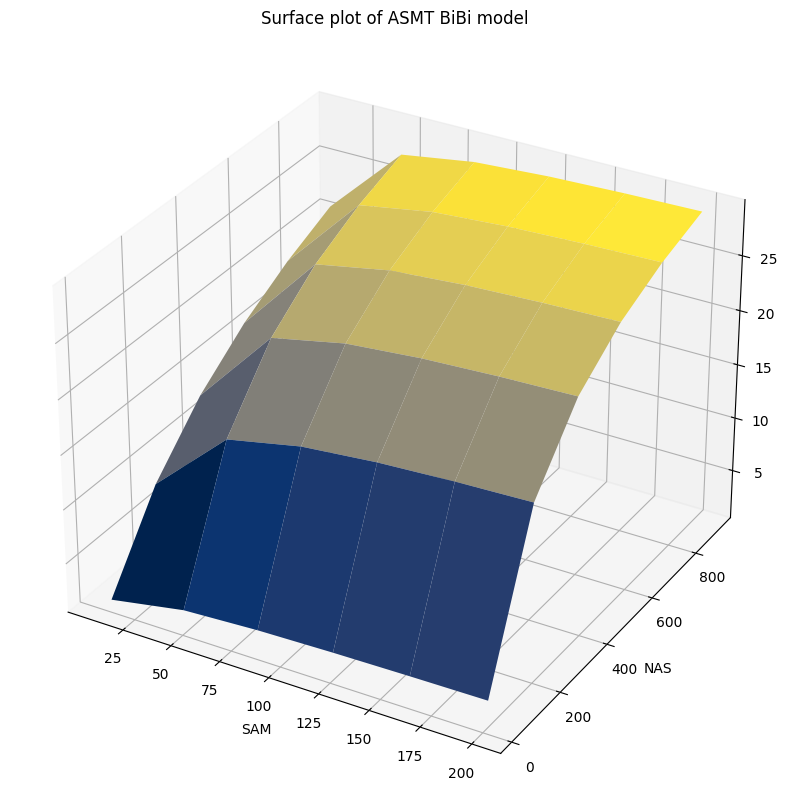

In [25]:
# Import libraries for plotting and plot velocities from Lotta paper
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

In [ ]:
# Plot data with noise

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

noise = np.random.normal(0, 0.05*Z, (len(Z),len(Z)))


Z = Z + noise

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model noise added')
plt.show()

In [ ]:
# Plot velocities from curve_fit determined parameters

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Vmax = 36
Ks_A = 21
K_AB = 197


Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

In [ ]:
def GoF(y, y_fit):
# Goodnes if Fit function
  # residual sum of squares
  ss_res = np.sum((y - y_fit) ** 2)

  # total sum of squares
  ss_tot = np.sum((y - np.mean(y)) ** 2)

  # r-squared
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [10]:
# Import pandas library
import pandas as pd

# Define a function that takes a list of file names as input
def read_triplicate_data(filename):
  from google.colab import drive
  drive.mount('/content/drive')
  # Open the CSV file
  file = '/content/drive/MyDrive/' + filename
  open(file, 'r', newline='')

  # Initialize an empty data frame
  #df = pd.DataFrame()
  # Loop through the file names
  df = pd.read_csv(file, sep =';', index_col=0, header=0).T
  # Append the data frame to the main data frame
  # Return the result data frame
  #df.columns = df.iloc[0]
  #df.drop(df.index[5]
  return df

df = read_triplicate_data('BiBi_sequential/ASMT_kin_Shengxiao_round_3_1.csv')

Mounted at /content/drive


In [11]:
df

,Conc NAS uM,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
SAM uM,NaN,10.000,30.000,60.000,90.000,140.000,200.000
20 uM NAS,20.0,10456.830,16661.960,21097.160,21393.710,17614.650,25985.870
20 uM NAS.1,20.0,10130.160,16073.390,23722.690,22141.190,22765.590,24497.430
20 uM NAS.2,20.0,10986.870,16796.830,21666.290,20692.900,20656.560,22593.390
50 uM NAS,50.0,13276.210,23178.060,18503.610,27524.650,32501.640,29290.030
50 uM NAS.1,50.0,12453.030,22247.490,30189.960,28581.840,30825.620,27922.820
50 uM NAS.2,50.0,14279.330,22680.380,25417.370,27359.000,30872.310,30067.940
100uM SAM,100.0,16962.930,24447.550,26046.430,29269.230,25772.150,28054.240
100uM NAS,100.0,16466.160,25384.660,31793.850,25624.630,31284.080,26504.280
100uM NAS.1,100.0,16451.970,25490.760,30692.610,28227.100,30024.440,28921.080


In [12]:
# group by NAS concentrations and average
grouped = df.groupby(df.columns[0])
areas_averaged = grouped.mean()
areas_averaged.round(1)

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,10524.6,16510.7,22162.0,21409.3,20345.6,24358.9
50.0,13336.2,22702.0,24703.6,27821.8,31399.9,29093.6
100.0,16627.0,25107.7,29511.0,27707.0,29026.9,27826.5
300.0,14295.8,21949.8,20071.1,20502.7,19862.6,15263.3
600.0,12489.0,6592.9,14308.6,9907.0,9605.1,10348.3
900.0,9730.2,4661.6,10588.4,9474.4,7095.5,7196.3


In [13]:
#Calculate standard deviations
esds = grouped.std()
esds.round(1)

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,432.4,384.7,1381.2,724.3,2589.5,1700.5
50.0,914.6,465.7,5875.8,663.4,954.5,1086.0
100.0,291.0,574.1,3050.5,1877.1,2888.2,1224.4
300.0,248.8,940.7,437.5,1881.8,1167.0,2303.1
600.0,432.2,589.3,849.1,843.5,1944.0,2024.1
900.0,425.7,353.5,653.2,624.2,1344.1,809.8


In [14]:
# conversion between area and nM/min: Divide area by 22 from standard curve and assay time 15 min
# convert to uM by dividing by 1000

velocities = areas_averaged/22/15/1000
velocities.round(4)

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,0.0319,0.0500,0.0672,0.0649,0.0617,0.0738
50.0,0.0404,0.0688,0.0749,0.0843,0.0952,0.0882
100.0,0.0504,0.0761,0.0894,0.0840,0.0880,0.0843
300.0,0.0433,0.0665,0.0608,0.0621,0.0602,0.0463
600.0,0.0378,0.0200,0.0434,0.0300,0.0291,0.0314
900.0,0.0295,0.0141,0.0321,0.0287,0.0215,0.0218


In [15]:
# calculate velocity esds
velocities_esds = esds/22/15/1000
velocities_esds.round(4)

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,0.0013,0.0012,0.0042,0.0022,0.0078,0.0052
50.0,0.0028,0.0014,0.0178,0.0020,0.0029,0.0033
100.0,0.0009,0.0017,0.0092,0.0057,0.0088,0.0037
300.0,0.0008,0.0029,0.0013,0.0057,0.0035,0.0070
600.0,0.0013,0.0018,0.0026,0.0026,0.0059,0.0061
900.0,0.0013,0.0011,0.0020,0.0019,0.0041,0.0025


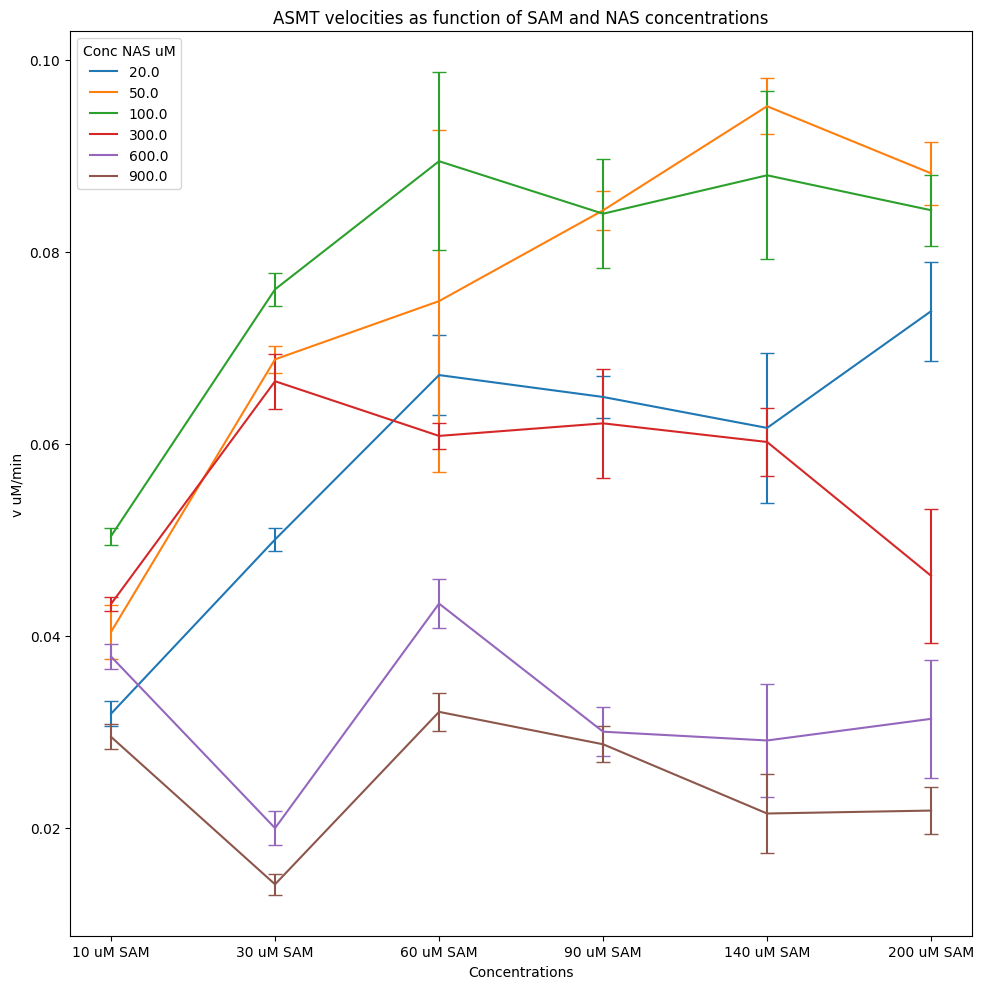

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
velocities.T.plot(yerr = velocities_esds.T, capsize = 5, ecolor = None,)
plt.xlabel("Concentrations")
plt.ylabel("v uM/min")
plt.title("ASMT velocities as function of SAM and NAS concentrations")

plt.tight_layout()
plt.show()


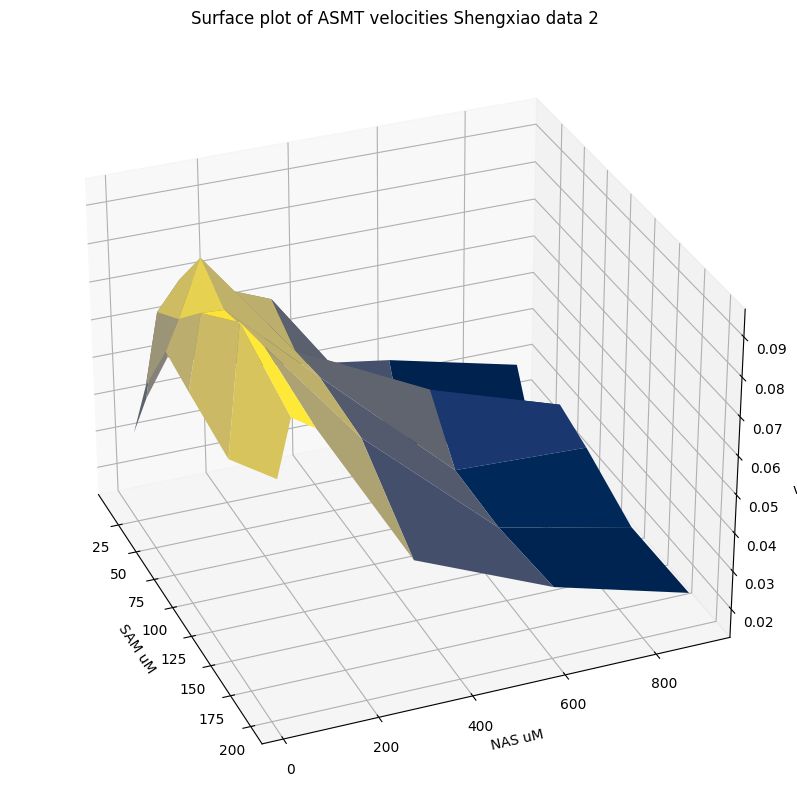

In [17]:
# Plot velocities from curve_fit determined parameters

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

#x = velocities.index
y = np.array([20,50,100,300,600,900])
#Y = velocities.columns
x = np.array([10, 30, 60, 90, 140, 200])

X,Y = np.meshgrid(x,y)

Z = velocities.values


# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.view_init(elev=30, azim=-22, roll=0)
ax.set_xlabel('SAM uM')
ax.set_ylabel('NAS uM')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT velocities Shengxiao data 2')
plt.show()

In [44]:
# Import curve_fit from scipy.optimize and determine random model parameters from the Shengxiao data 2
import os
from scipy.optimize import curve_fit

xdata = np.column_stack((X.flatten(), Y.flatten()))

#print(xdata)
#print(velocities.values.flatten())

popt, pcov = curve_fit(BiBi_random, xdata, velocities.values.flatten())
variance = [pcov[0][0], pcov[1][1], pcov[2][2]]
np.set_printoptions(precision=4)
print('Model parameters: ', popt)
print('ESD             : ', np.sqrt(variance))
print('Overfit estimate: ', np.linalg.cond(pcov))

Model parameters:  [  0.0578 -29.9033   1.      -4.7879   4.3977]
ESD             :  [inf inf inf]
Overfit estimate:  inf


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


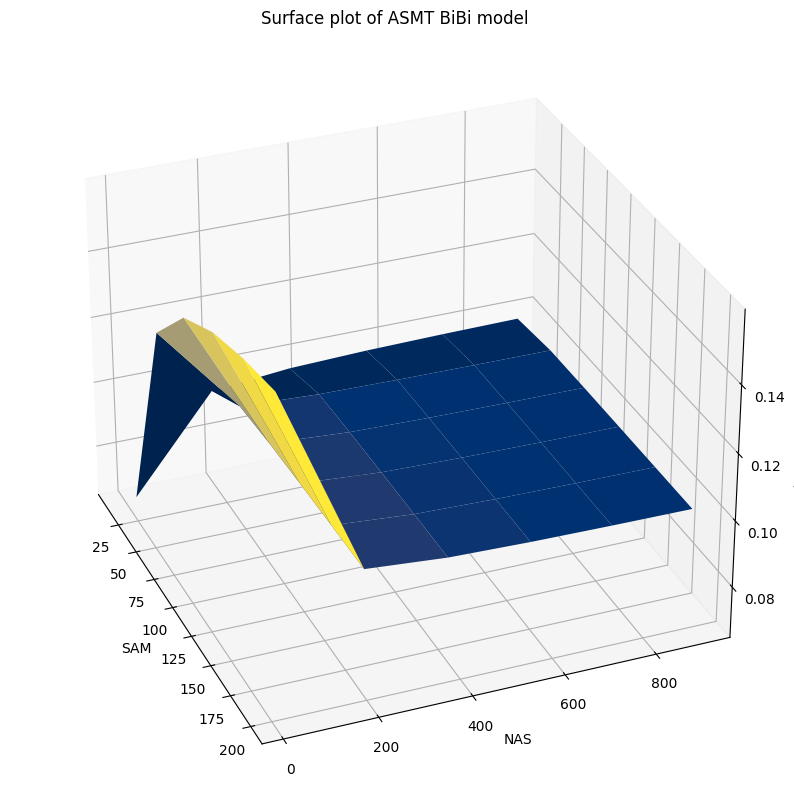

In [43]:
# Plot velocities from curve_fit determined parameters

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

#X,Y = np.meshgrid(x_SAM, x_NAS)

Vmax = 0.1
Ks_A = -22
K_AB = -8.4


Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.view_init(elev=30, azim=-22, roll=0)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

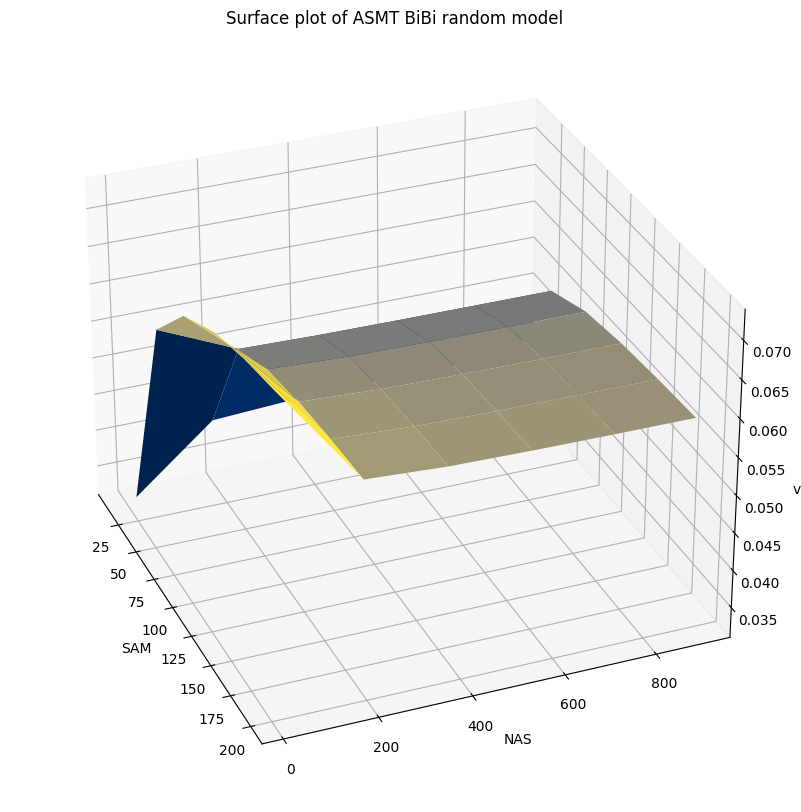

In [45]:
# Plot velocities from curve_fit determined random model parameters

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

#X,Y = np.meshgrid(x_SAM, x_NAS)

Vmax = .06
Ks_A = -29
Ks_B = 1
K_AB = -4.7
K_BA = 4.4


Z = BiBi_random_mesh(X,Y,  Vmax, Ks_A, Ks_B, K_AB, K_BA)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.view_init(elev=30, azim=-22, roll=0)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi random model')
plt.show()